Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data Head:
    vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB

Data Info:
 None
Decision Tree Accuracy: 0.9769
Random Forest Accuracy: 0.9827


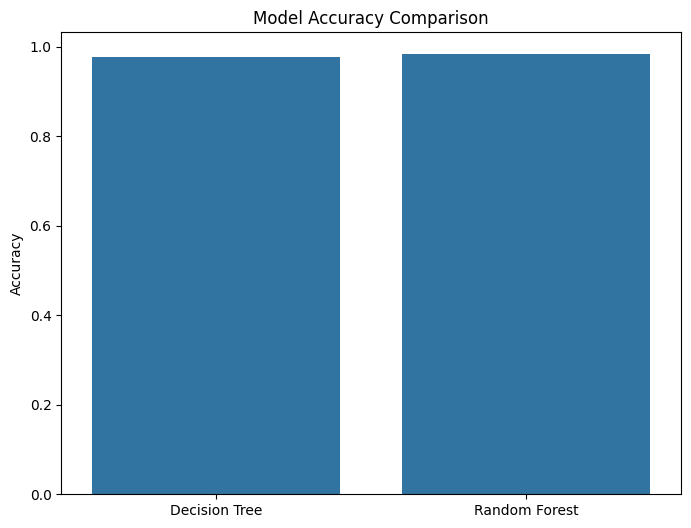

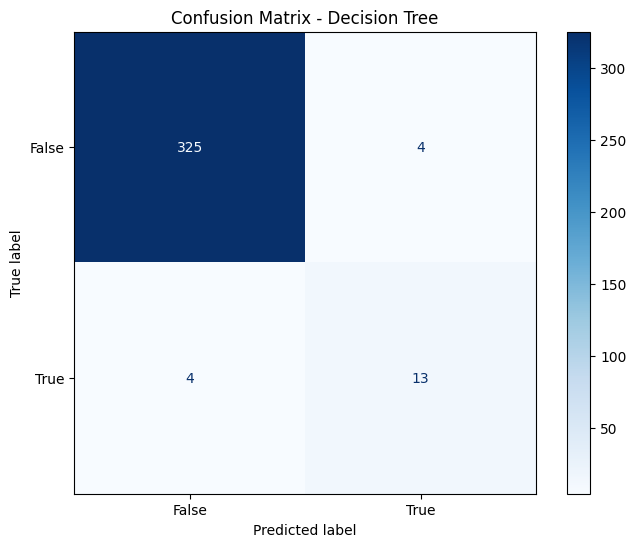

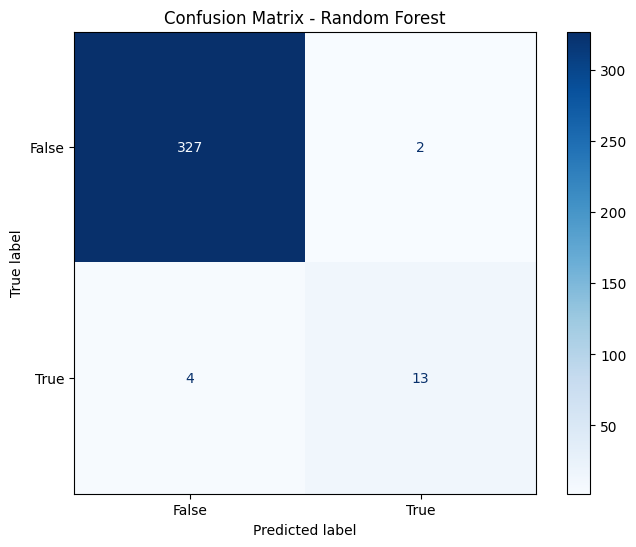

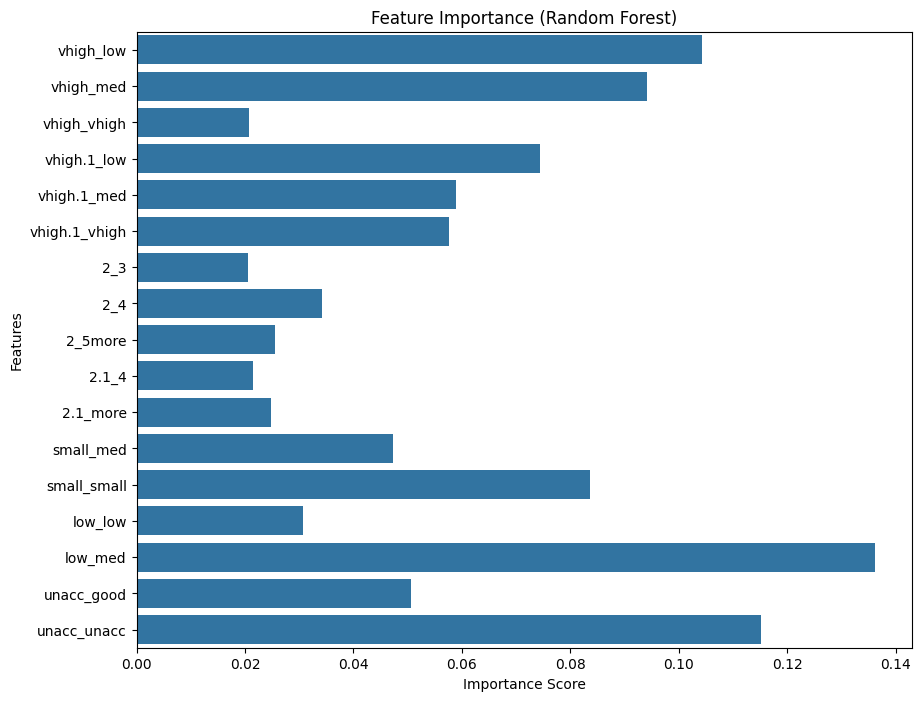

The better performing model : Random Forest


In [2]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 업로드
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/car_evaluation.csv"
data = pd.read_csv(file_path)

print("Data Head:\n", data.head())
print("\nData Info:\n", data.info())

# 범주형 데이터를 숫자로 변환
data_encoded = pd.get_dummies(data, drop_first=True)

# 특성과 타깃 분리
X = data_encoded.drop('class', axis=1) if 'class' in data_encoded.columns else data_encoded.iloc[:, :-1]
y = data_encoded['class'] if 'class' in data_encoded.columns else data_encoded.iloc[:, -1]

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용 및 시각화
# PCA로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('PCA 2D Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.show()

# PCA 적용 전후 랜덤포레스트 모델 성능 비교
# 랜덤포레스트 - PCA 적용 전
rf_model_original = RandomForestClassifier(random_state=42)
rf_model_original.fit(X_scaled, y)
original_accuracy = accuracy_score(y, rf_model_original.predict(X_scaled))

# 랜덤포레스트 - PCA 적용 후
rf_model_pca = RandomForestClassifier(random_state=42)
rf_model_pca.fit(X_pca, y)
pca_accuracy = accuracy_score(y, rf_model_pca.predict(X_pca))

print(f"Random Forest Accuracy (Original Data): {original_accuracy:.4f}")
print(f"Random Forest Accuracy (PCA Data): {pca_accuracy:.4f}")

# 결과 시각화
# 정확도 비교
plt.figure(figsize=(8, 6))
models = ['Original Data', 'PCA Data']
accuracies = [original_accuracy, pca_accuracy]
sns.barplot(x=models, y=accuracies, palette='Blues')
plt.title('Random Forest Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# PCA 주성분 기여도 분석
plt.figure(figsize=(8, 6))
explained_variance = pca.explained_variance_ratio_
sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance))], y=explained_variance, palette='Greens')
plt.title('PCA Explained Variance Ratio')
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Components')
plt.show()
